# 4.7 频次直方图、数据区间划分和分布密度

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

data = np.random.randn(1000)

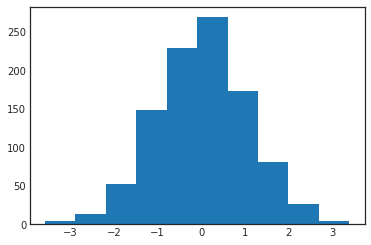

In [2]:
plt.hist(data);

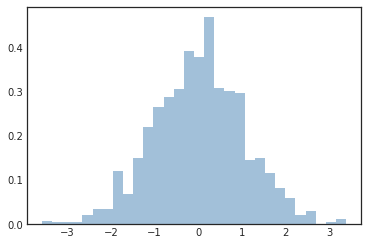

In [3]:
# normed -> density
plt.hist(data, bins=30, density=True, alpha=0.5, 
         histtype='stepfilled', color='steelblue', edgecolor='none');

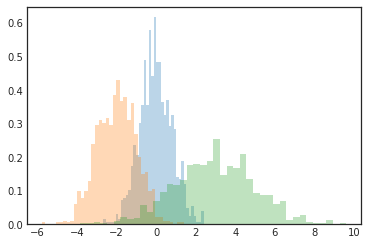

In [4]:
x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)

# normed -> density
kwargs = dict(histtype='stepfilled', alpha=0.3, density=True, bins=40)

plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs);

In [5]:
counts, bin_edges = np.histogram(data, bins=5)
print(counts)

[ 18 200 498 254  30]


## 二维频次直方图与数据区间划分

In [6]:
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 1000).T

### 1. plt.hist2d: 二次频次直方图

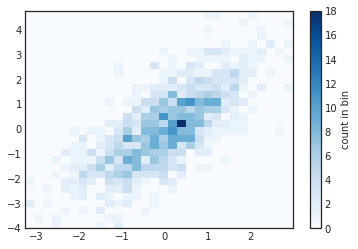

In [7]:
plt.hist2d(x, y, bins=30, cmap='Blues')
cb = plt.colorbar()
cb.set_label('count in bin')

In [8]:
counts, xedges, yedges = np.histogram2d(x, y, bins=30)

### 2. plt.hexbin: 六边形区间划分

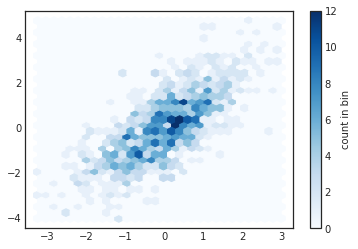

In [9]:
plt.hexbin(x, y, gridsize=30, cmap='Blues')
cb = plt.colorbar(label='count in bin')

### 3. 核密度估计

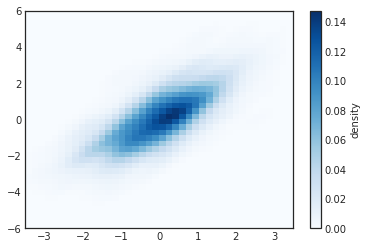

In [10]:
from scipy.stats import gaussian_kde

# 拟合数据维度[Ndim, Nsamples]
data = np.vstack([x, y])
kde = gaussian_kde(data)

# 用一组规则的网格数据进行拟合
xgrid = np.linspace(-3.5, 3.5, 40)
ygrid = np.linspace(-6, 6, 40)
Xgrid, Ygrid = np.meshgrid(xgrid, ygrid)
Z = kde.evaluate(np.vstack([Xgrid.ravel(), Ygrid.ravel()]))

# 画出结果图
plt.imshow(Z.reshape(Xgrid.shape), origin='lower', aspect='auto',
           extent=[-3.5, 3.5, -6, 6], cmap='Blues')
cb = plt.colorbar()
cb.set_label("density")